In [10]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.DataFrame()

In [3]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


C:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


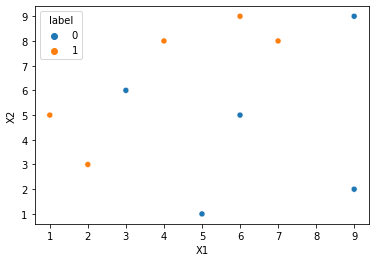

In [8]:
import seaborn as sns
sns.scatterplot(df["X1"],df["X2"],hue=df["label"]);

In [9]:
df["weight"] = 1/df.shape[0]
df.sample(4)

,X1,X2,label,weight
0,1,5,1,0.1
5,6,9,1,0.1
3,4,8,1,0.1
7,7,8,1,0.1


In [25]:
X = df.iloc[:,:2].values

In [24]:
y = df["label"].values

In [11]:
dt1 = DecisionTreeClassifier(max_depth=1)

C:\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


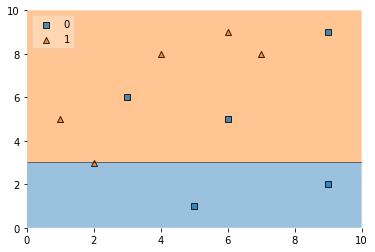

In [27]:
plot_decision_regions(X, y, clf=dt1, legend=2);

In [15]:
dt1.fit(X=df.iloc[:,:2], y= df["label"])

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

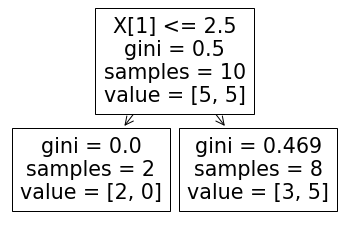

In [19]:
from sklearn.tree import plot_tree
plot_tree(dt1)

In [18]:
df["predict"] = dt1.predict(X=df.iloc[:,:2])
df

,X1,X2,label,weight,predict
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [31]:
# Calculate the weight of error Model
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error + 0.0000000001))

In [32]:
#Alpha values for FIrst Decision
alpha1 = calculate_model_weight(0.3)

In [33]:
def update_weights(row, alpha=0.432):
    if row["label"] == row["predict"]:
        alpha = -alpha
    return row["weight"]*np.exp(alpha)

In [34]:
df["updated_weights"] = df.apply(update_weights, axis=1)
df.head()

,X1,X2,label,weight,predict,updated_weights
0,1,5,1,0.1,1,0.064921
1,2,3,1,0.1,1,0.064921
2,3,6,0,0.1,1,0.154034
3,4,8,1,0.1,1,0.064921
4,5,1,0,0.1,0,0.064921


In [35]:
#Update and Normalized Weights
df["updated_weights"] = df["updated_weights"]/df["updated_weights"].sum()
df.head()

,X1,X2,label,weight,predict,updated_weights
0,1,5,1,0.1,1,0.070832
1,2,3,1,0.1,1,0.070832
2,3,6,0,0.1,1,0.168058
3,4,8,1,0.1,1,0.070832
4,5,1,0,0.1,0,0.070832


In [36]:
#Creating Range
df["cumsum_upper"] = np.cumsum(df["updated_weights"])
df["cumsum-lower"] = df["cumsum_upper"] - df["updated_weights"]
df.head()

,X1,X2,label,weight,predict,updated_weights,cumsum_upper,cumsum-lower
0,1,5,1,0.1,1,0.070832,0.070832,0.000000
1,2,3,1,0.1,1,0.070832,0.141664,0.070832
2,3,6,0,0.1,1,0.168058,0.309723,0.141664
3,4,8,1,0.1,1,0.070832,0.380555,0.309723
4,5,1,0,0.1,0,0.070832,0.451387,0.380555


In [52]:
# Selecting new 10 data randomly selected which line in given range
def creat_new_df(df):
    num_lis = []
    for i in range(df.shape[0]):
        num = np.random.random()
        for index, data in df.iterrows():
            if num>=data["cumsum-lower"] and num< data["cumsum_upper"]:
                num_lis.append(index)
    return num_lis

In [ ]:
df.iterrows

In [58]:
df.columns

Index(['X1', 'X2', 'label', 'weight', 'predict', 'updated_weights',
       'cumsum_upper', 'cumsum-lower'],
      dtype='object')

## Second Decision Tree

In [53]:
numbs = creat_new_df(df)
numbs

[6, 8, 2, 3, 6, 2, 2, 9, 5, 1]

In [66]:
df2 = df.iloc[numbs]
df2 = df2[['X1', 'X2', 'label']]

X = df2[['X1', 'X2']].values
y = df2["label"].values

[Text(0.5, 0.75, 'X[1] <= 7.0\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.75, 0.25, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]')]

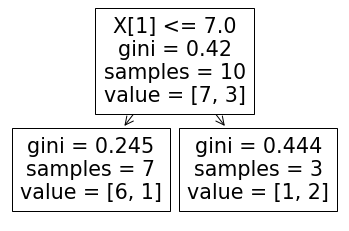

In [64]:
dt2 = DecisionTreeClassifier(max_depth=1)
dt2.fit(X,y)
plot_tree(dt2)

In [68]:
df2["weights"] = 1/df2.shape[0]
df2["prict"] = dt2.predict(X)
df2.head()

,X1,X2,label,weights,prict
6,6,5,0,0.1,0
8,9,9,0,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,1
6,6,5,0,0.1,0


In [74]:
df2

,X1,X2,label,weights,prict
6,6,5,0,0.1,0
8,9,9,0,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,1
6,6,5,0,0.1,0
2,3,6,0,0.1,0
2,3,6,0,0.1,0
9,9,2,0,0.1,0
5,6,9,1,0.1,1
1,2,3,1,0.1,0


In [72]:
def count_diff(df):
    count = 0
    for i,row in df.iterrows():
        if row["label"] != row["prict"]:
            count+=1
    return count

In [73]:
count = count_diff(df2)
count

2

<AxesSubplot:>

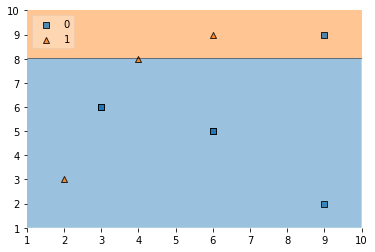

In [65]:
plot_decision_regions(X,y,clf = dt2, legend=2)

In [76]:
alpha2 = calculate_model_weight(count*0.1)
alpha2

0.6931471803099453

In [81]:
def update_weights(row, alpha=0.693):
    if row["label"] == row["prict"]:
        alpha = -alpha
    return row["weights"]*np.exp(alpha)

In [82]:
df2["updated_weights"] = df2.apply(update_weights, axis=1)
df2

,X1,X2,label,weights,prict,updated_weights
6,6,5,0,0.1,0,0.050007
8,9,9,0,0.1,1,0.199971
2,3,6,0,0.1,0,0.050007
3,4,8,1,0.1,1,0.050007
6,6,5,0,0.1,0,0.050007
2,3,6,0,0.1,0,0.050007
2,3,6,0,0.1,0,0.050007
9,9,2,0,0.1,0,0.050007
5,6,9,1,0.1,1,0.050007
1,2,3,1,0.1,0,0.199971


In [84]:
def create_cumsum(df):
    df["cumsum_upper"] = np.cumsum(df["updated_weights"])
    df["cumsum_lower"] = df2["cumsum_upper"] - df["updated_weights"]
    return df

In [85]:
df2 = create_cumsum(df2)
df2.head()

,X1,X2,label,weights,prict,updated_weights,cumsum_upper,cumsum_lower
6,6,5,0,0.1,0,0.050007,0.050007,0.000000
8,9,9,0,0.1,1,0.199971,0.249978,0.050007
2,3,6,0,0.1,0,0.050007,0.299985,0.249978
3,4,8,1,0.1,1,0.050007,0.349993,0.299985
6,6,5,0,0.1,0,0.050007,0.400000,0.349993


In [91]:
df2.shape

(10, 8)

In [98]:
# Selecting new 10 data randomly selected which line in given range
def creat_new_df(df):
    num_lis = []
    while(len(num_lis) <= df.shape[0]):
        num = np.random.random()
        for index, data in df.iterrows():
            if num>data["cumsum_lower"] and num< data["cumsum_upper"]:
                num_lis.append(index)
    return num_lis

In [99]:
num_lis=creat_new_df(df2)
num_lis

[1, 2, 8, 1, 2, 8, 1, 1, 1, 1, 1]

## Decision Tree 3

In [100]:
dt3 = DecisionTreeClassifier(max_depth=1)

In [101]:
#Data
df3 = df.iloc[num_lis][['X1', 'X2', 'label']]
df3.head()

,X1,X2,label
1,2,3,1
2,3,6,0
8,9,9,0
1,2,3,1
2,3,6,0


In [106]:
#Splitting X and y
X = df3.iloc[:,:2].values
y = df3.iloc[:,-1].values

In [103]:
X, y

(   X1  X2
 1   2   3
 2   3   6
 8   9   9
 1   2   3
 2   3   6
 8   9   9
 1   2   3
 1   2   3
 1   2   3
 1   2   3
 1   2   3,
 1    1
 2    0
 8    0
 1    1
 2    0
 8    0
 1    1
 1    1
 1    1
 1    1
 1    1
 Name: label, dtype: int64)

[Text(0.5, 0.75, 'X[1] <= 4.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

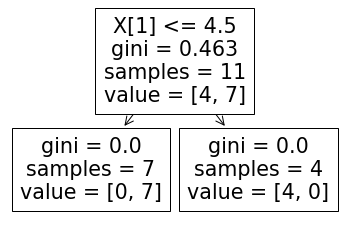

In [104]:
dt3.fit(X,y)
plot_tree(dt3)

C:\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<AxesSubplot:>

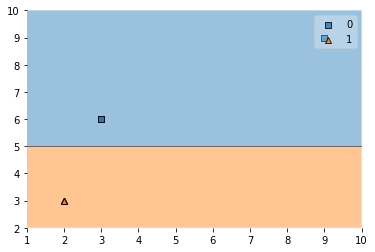

In [107]:
plot_decision_regions(X,y,clf=dt3)

In [108]:
alpha3 = calculate_model_weight(0)
alpha3

11.512925464970229

## Final Output 

In [112]:
df

,X1,X2,label,weight,predict,updated_weights,cumsum_upper,cumsum-lower
0,1,5,1,0.1,1,0.070832,0.070832,0.000000
1,2,3,1,0.1,1,0.070832,0.141664,0.070832
2,3,6,0,0.1,1,0.168058,0.309723,0.141664
3,4,8,1,0.1,1,0.070832,0.380555,0.309723
4,5,1,0,0.1,0,0.070832,0.451387,0.380555
5,6,9,1,0.1,1,0.070832,0.522219,0.451387
6,6,5,0,0.1,1,0.168058,0.690277,0.522219
7,7,8,1,0.1,1,0.070832,0.761109,0.690277
8,9,9,0,0.1,1,0.168058,0.929168,0.761109
9,9,2,0,0.1,0,0.070832,1.000000,0.929168


In [115]:
data = [[1,5]]

In [116]:
#Decision tree 1
dt1.predict(data)

C:\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [117]:
#Decision tree 2
dt2.predict(data)

array([0], dtype=int64)

In [118]:
#Decision tree 3
dt3.predict(data)

C:\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [121]:
alpha1*(1) + alpha2*(0) +alpha3*(0)

0.42364893002693516